<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('/Users/liamsweeney/dat-11-15/dat-11-15/dat-11-15/dat-11-15/dat-11-15/Homework/Unit1/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [8]:
# Answer:
len(movies)


979

In [9]:
len(movies.columns)

6

#### Check the data type of each column.

In [10]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [45]:
type(movies['content_rating'])

pandas.core.series.Series

In [52]:
type(movies['content_rating'][0])

str

#### Calculate the average movie duration.

In [12]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [14]:
# Answer:
movies.sort_values(by='duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

(array([193., 560., 177.,  41.,   8.]),
 array([ 64. ,  99.6, 135.2, 170.8, 206.4, 242. ]),
 <BarContainer object of 5 artists>)

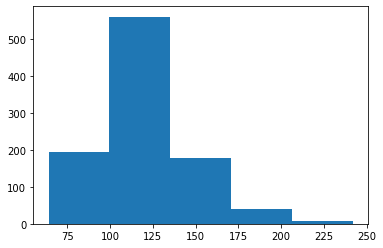

In [16]:
# Answer:
plt.hist(movies['duration'], bins = 5)

#### Use a box plot to display that same data.

<AxesSubplot:>

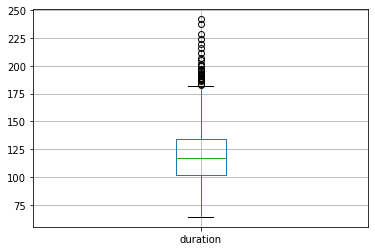

In [17]:
# Answer:
movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [21]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

In [30]:
movies['count'] = 1
data = movies.groupby('content_rating')['count'].sum().reset_index()


In [32]:
px.bar(data, x = "content_rating", y = "count")

In [33]:
# Answer:
# did not figure out, px.histogram(data, x='content_rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [54]:
# Answer: df.replace({'A': r'^ba.$'}, {'A': 'new'}, regex=True)
#movies.replace({'content_rating': r'Approved'}, {'content_rating': 'UNRATED'}, regex=True)
#movies['content_rating'] = movies['content_rating'].replace(['APPROVED', 'Passed'], ['UNRATED'])
movies['content_rating'] = movies['content_rating'].replace(['APPROVED', 'NOT RATED'], 'UNRATED')
movies['content_rating'].value_counts()


R          460
PG-13      189
UNRATED    150
PG         123
G           32
PASSED       7
NC-17        7
X            4
GP           3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [55]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    150
PG         123
G           32
NC-17       12
PASSED       7
GP           3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [56]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
count             0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [58]:
# Answer:
movies.isnull(True)

TypeError: isnull() takes 1 positional argument but 2 were given

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [66]:
# Answer:
two_hour_movie = movies[movies['duration'] > 120]
two_hour_movie.mean()


star_rating      7.953670
duration       143.385321
count            1.000000
dtype: float64

In [67]:
short_movie = movies[movies['duration'] < 120]
short_movie.mean()

star_rating      7.838667
duration       102.405714
count            1.000000
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [ ]:
# Answer:


#### Calculate the average duration for each genre.

In [69]:
# Answer:


movies.groupby('genre').mean()



,star_rating,duration,count
genre,,,
Action,7.884559,126.485294,1.0
Adventure,7.933333,134.840000,1.0
Animation,7.914516,96.596774,1.0
Biography,7.862338,131.844156,1.0
Comedy,7.822436,107.602564,1.0
Crime,7.916935,122.298387,1.0
Drama,7.902518,126.539568,1.0
Family,7.850000,107.500000,1.0
Fantasy,7.700000,112.000000,1.0


## Advanced level

#### Visualize the relationship between content rating and duration.

In [71]:
# Answer:
# create a grouping for the chart
#data = df.groupby('visit_date')[['visitors', 'reserve_visitors']].sum().reset_index()
# create a column for day of the week to use for later charts
#data['day'] = data.visit_date.dt.day_name()

# simple scatter chart
px.bar(movies, x='content_rating', y='duration')

#### Determine the top rated movie (by star rating) for each genre.

In [202]:
# Answer:


#movies = movies.set_index('genre')
#movies
movies[['star_rating']].max()
movies.groupby(movies.index)['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [116]:
movies

,star_rating,title,content_rating,duration,actors_list,count
genre,,,,,,
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",1
Crime,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",1
Crime,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",1
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",1
Crime,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1
...,...,...,...,...,...,...
Comedy,7.4,Tootsie,PG,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",1
Adventure,7.4,Back to the Future Part III,PG,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",1
Action,7.4,Master and Commander: The Far Side of the World,PG-13,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",1


In [123]:
# Answer:

movies[['title']]
duplicates = movies.duplicated(subset=['title'])
movies['Duplicates'] = duplicates
movies
movies[movies['Duplicates']==True]
#how do i see the preceding row?

,star_rating,title,content_rating,duration,actors_list,count,Duplicates
genre,,,,,,,
Crime,7.8,The Girl with the Dragon Tattoo,R,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",1,True
Horror,7.5,Dracula,R,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",1,True
Crime,7.5,Les Miserables,PG-13,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",1,True
Adventure,7.4,True Grit,NaN,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",1,True


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [198]:
# Answer:

genre = movies.groupby(['genre']).sum()
genre['count'] > 10
keep = genre[genre['count'] > 10]
keep['average_score'] = keep['star_rating']/keep['count']
keep
#genre = movies.groupby(['genre']).sum()
#genre['average_rating'] = np.where(genre['count'] > 10, genre['count'], genre['star_rating']/genre['count'])
#genre
#avg=genre['star_rating']/[genre['count']]
#genre[genre['count' > 10]]

<ipython-input-198-7c178c6f6872>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,star_rating,duration,count,Duplicates,average_score
genre,,,,,
Action,1072.3,17202,136,0,7.884559
Adventure,595.0,10113,75,1,7.933333
Animation,490.7,5989,62,0,7.914516
Biography,605.4,10152,77,0,7.862338
Comedy,1220.3,16786,156,0,7.822436
Crime,981.7,15165,124,2,7.916935
Drama,2196.9,35178,278,0,7.902518
Horror,226.4,2973,29,1,7.806897
Mystery,127.6,1850,16,0,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!